In [ ]:
%pip install scipy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Sample - Superstore.csv')
df

In [ ]:


df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y') #converting string dates to datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df.drop_duplicates(inplace=True)   #drop df duplications

df['Order Month'] = df['Order Date'].dt.month     #by getting month and year infos from order date and create new columns based on them
df['Order Year'] = df['Order Date'].dt.year       
df['Ship Days'] = (df['Ship Date'] - df['Order Date']).dt.days   #Calculating shipping days

df.set_index('Order Date', inplace=True) 
sales_month_by_period = df['Sales'].resample('M').sum().sort_index()  #separating sales infos by month and year
profit_month_by_period = df['Profit'].resample('M').sum().sort_index()



In [ ]:
plt.figure(figsize=(15, 10))

# Monthly Sales Line Chart
plt.subplot(2, 2, 1)
plt.plot(sales_month_by_period.index, sales_month_by_period.values, 
         marker='o', linewidth=2, color='blue')
plt.title('Monthly Sales Trend (Time Series)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Monthly Profit Line Chart
plt.subplot(2, 2, 2)
plt.plot(profit_month_by_period.index, profit_month_by_period.values, 
         marker='s', linewidth=2, color='green')
plt.title('Monthly Profit Trend (Time Series)')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Combined Sales and Profit Line Chart
plt.subplot(2, 1, 2)
ax1 = plt.gca()
ax2 = ax1.twinx()

line1 = ax1.plot(sales_month_by_period.index, sales_month_by_period.values, 
                 'b-', marker='o', label='Sales')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales', color='b')
ax1.tick_params(axis='y', labelcolor='b')

line2 = ax2.plot(profit_month_by_period.index, profit_month_by_period.values, 
                 'g-', marker='s', label='Profit')
ax2.set_ylabel('Profit', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Monthly Sales vs Profit Trend')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Add legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

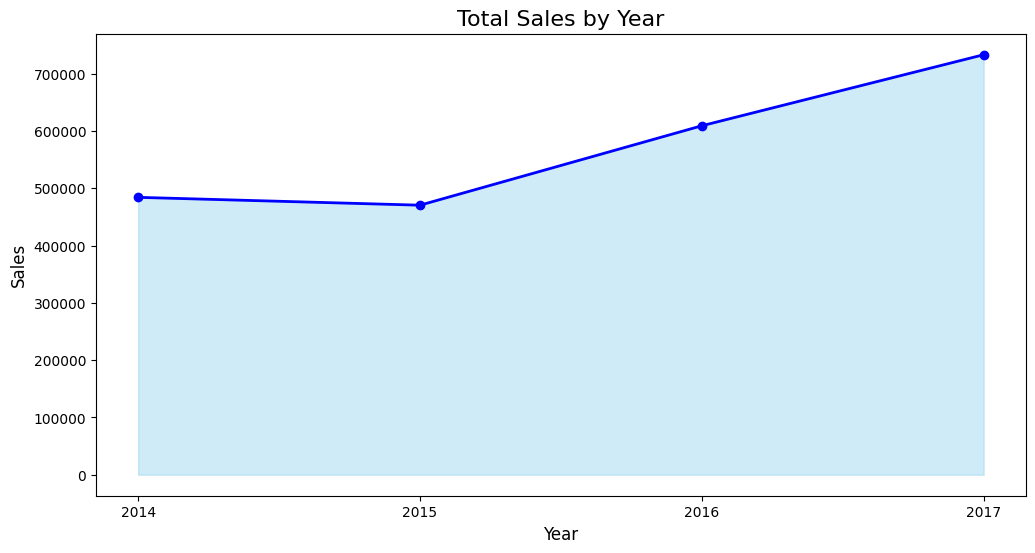

In [9]:
# Total Sales by Year
df_reset = df.reset_index()
sales_by_year = df_reset.groupby("Order Year")["Sales"].sum().reset_index()
       
plt.figure(figsize=(12,6))

# Area
plt.fill_between(sales_by_year["Order Year"], 
                 sales_by_year["Sales"], 
                 color="skyblue", 
                 alpha=0.4)

# Line
plt.plot(sales_by_year["Order Year"], 
         sales_by_year["Sales"], 
         marker="o", 
         color="blue", 
         linewidth=2)

plt.title("Total Sales by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(sales_by_year["Order Year"])
plt.ticklabel_format(style='plain', axis='y')
plt.show()

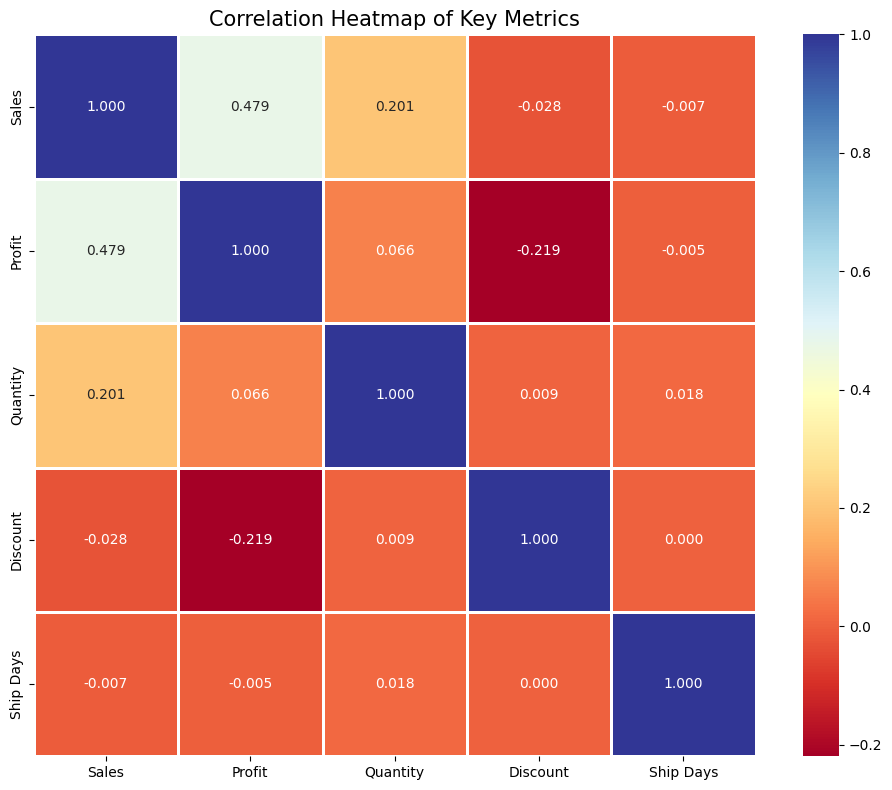

In [10]:
# Correlation Heatmap
corr_matrix = df_reset[['Sales', 'Profit', 'Quantity', 'Discount', 'Ship Days']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlBu',
    fmt=".3f",
    linewidths=1,
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap of Key Metrics", fontsize=15)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [ ]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

In [ ]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

In [ ]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')



In [ ]:
#https://seaborn.pydata.org/generated/seaborn.kdeplot.html
ax = sns.kdeplot(data=df, x='Speed_mph',
                 hue=None)

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x=df["Speed_mph"])

In [ ]:
ax = sns.scatterplot(x='Speed_mph',
                y='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

In [ ]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].dropna().corr()
df_corr

In [ ]:
sns.heatmap(df_corr, annot=True)

In [ ]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()